In [1]:
import numpy as np
import matplotlib.pyplot as plt

from steady_state_flow import run_simulation as flow_simulation
from ising_model import run_simulation as generate_ising_grid
from gaussian_random_fields import generate_grf, matern_covariance, generate_binary_field

ImportError: cannot import name 'run_simulation' from 'ising_model' (/home/andrbenn/workspace/irc_feb_14/src/ising_model.py)

In [3]:
N = 100
T = 2.0
steps = 250

k_low = 1e-3
k_high = 1.0

n_iter = 3000

frac_list = []
k_eff_list = []

for _ in range(n_iter):
    grid = generate_ising_grid(N, T, steps=steps)
    grid[grid == -1] = 0
    frac_high_k = np.mean(grid)
    k_eff, head, k_grid = flow_simulation(size=N, k_low=k_low, k_high=k_high, binary_grid=grid)
    frac_list.append(frac_high_k)
    k_eff_list.append(k_eff)

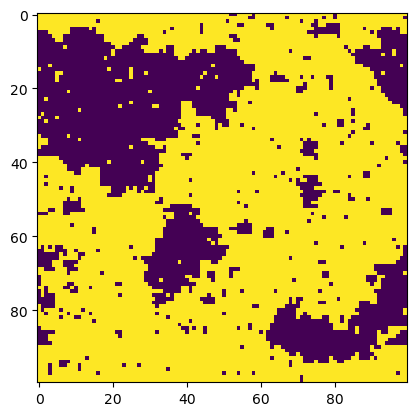

In [4]:
plt.imshow(k_grid)

Text(0.5, 1.0, 'Using Ising model to generate conductivity field')

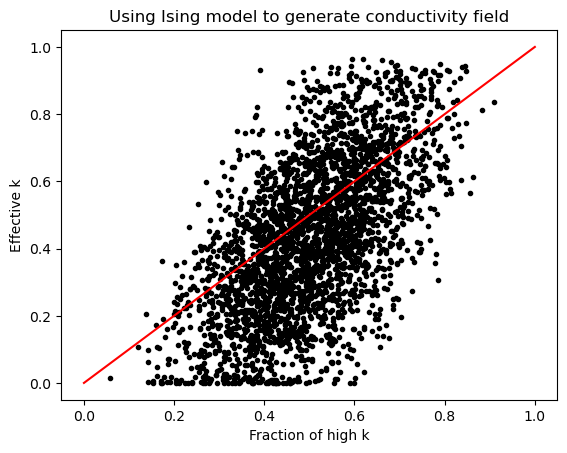

In [5]:
plt.scatter(frac_list, k_eff_list, marker='.', color='black')
#plt.semilogy()
plt.plot([0, 1], [k_low, k_high], color='red')
plt.xlabel('Fraction of high k')
plt.ylabel('Effective k')
plt.title('Using Ising model to generate conductivity field')

In [15]:
N = 50

k_low = 1e-3
k_high = 1.0

n_iter = 500

frac_list = []
k_eff_list = []

for _ in range(n_iter):
    grid = generate_grf(N, N, matern_covariance, correlation_length=20.0)
    grid = generate_binary_field(grid, threshold=0.0)
    frac_high_k = np.mean(grid)
    k_eff, head, k_grid = flow_simulation(size=N, k_low=k_low, k_high=k_high, binary_grid=grid)
    frac_list.append(frac_high_k)
    k_eff_list.append(k_eff)

Text(0.5, 1.0, 'Using Gaussian random field to generate conductivity field')

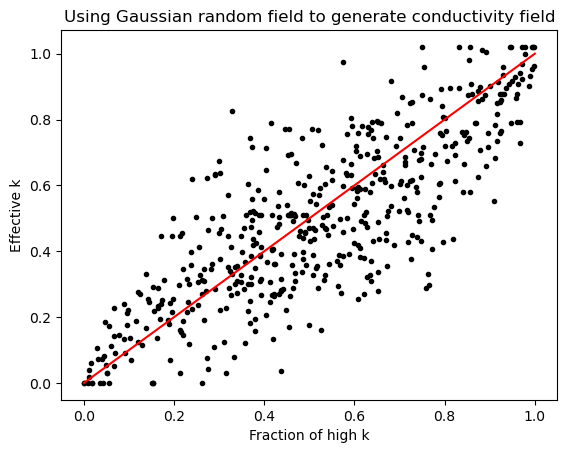

In [16]:
plt.scatter(frac_list, k_eff_list, marker='.', color='black')
#plt.semilogy()
plt.plot([0, 1], [k_low, k_high], color='red')
plt.xlabel('Fraction of high k')
plt.ylabel('Effective k')
plt.title('Using Gaussian random field to generate conductivity field')